In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define range of r
n = 1000
m = 100
rvalues = np.linspace(0.8, 4, n)
lambdas = np.zeros_like(rvalues)

maps = np.zeros((n, m))
for (i, r) in enumerate(rvalues):
    x = 0.1
    result = []
    for t in range(1000):
        x = x * r * (1 - x)
        result.append(np.log(r * abs(1 - 2*x)))
    lambdas[i] = np.mean(result)
    for t in range(m):
        x = x *r * (1 - x)
        maps[i, t] = x

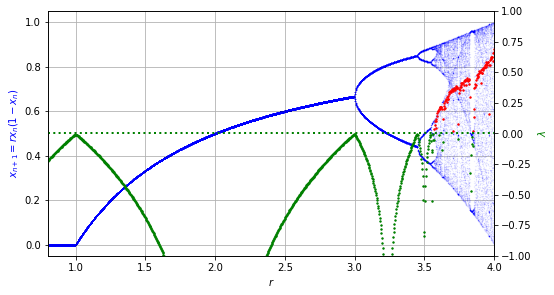

In [3]:
fig, ax1 = plt.subplots(figsize = (8, 4.5))
ax2 = ax1.twinx()

for i in range(m):
    ax1.plot(rvalues, maps[:, i], 'o', ms = 0.3, alpha = 0.1, c = 'b')

l_pos = lambdas > 0
l_neg = np.logical_not(l_pos)
    
ax2.scatter(rvalues[l_neg], lambdas[l_neg], s = 2, c = 'g')
ax2.scatter(rvalues[l_pos], lambdas[l_pos], s = 2, c = 'r')
ax2.plot([rvalues[0], rvalues[-1]], [0, 0], ':', lw = 2, c = 'g')

ax1.set_xlabel('$r$')
ax1.set_ylabel('$x_{n+1} = rx_n(1 - x_n)$', color = 'b')
ax2.set_ylabel('$\lambda$', color = 'g')

ax1.set_xlim(rvalues[0], rvalues[-1])
ax2.set_ylim(-1, 1)

ax1.grid()

fig.savefig('lyapunov_logistic.png', dpi = 300)

plt.show()

In [4]:
def makeEllipsoid(r, x_0, y_0, alpha = 0.05):
    theta = np.linspace(0, 2 * np.pi)
    x = alpha * r * np.cos(theta) + x_0
    y = r * np.sin(theta) + y_0

    return x, y

f = lambda x, x0: (x - x0) ** 2 + x0

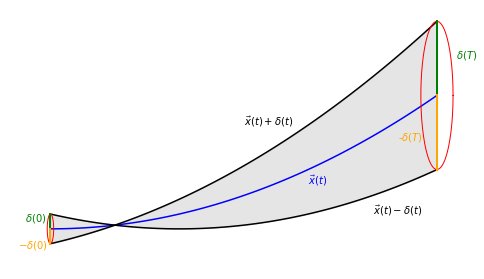

In [5]:
d = 1

x = np.linspace(0, 3, 100)
y = 0.5 * (f(x, d) + f(x, -d))

fig, ax = plt.subplots(figsize = (8, 4.5))

y1 = f(x, -d)
y2 = f(x, d)

ax.plot(x, y, c = 'b')
ax.plot(x, y1, c = 'k')
ax.plot(x, y2, c = 'k')

ax.fill_between(x, y1, y2, color = 'k', alpha = 0.1)

for i in range(0, -2, -1):
    a = 0.025
    r = abs(y1[i] - y[i])
    x_y = [x[i]] * 2
    y_y = [y[i], y[i] + r]

    x_e, y_e = makeEllipsoid(r, x[i], y[i], a)

    ax.plot(x_e, y_e, 'r', lw = 1)
    ax.plot(x_y, y_y, 'g', lw = 2)
    
    y_y = [y[i], y[i] - r]
    ax.plot(x_y, y_y, 'orange', lw = 2)
    
ax.text(-0.2, 1.5, r"$\delta(0)$", color = 'g')
ax.text(-0.25, -0.3, r"$-\delta(0)$", color = 'orange')

ax.text(2, 4, r"$\vec{x}(t)$", color = 'b')
ax.text(2.5, 2, r"$\vec{x}(t) - \delta(t)$")
ax.text(1.5, 8, r"$\vec{x}(t) + \delta(t)$")
ax.text(3.15, 12.5, r"$\delta(T)$", color = 'g')
ax.text(2.7, 7, r"-$\delta(T)$", color = 'orange')

ax.axis('off')

fig.savefig("lyapunov_explain.png", dpi = 300)

plt.show()